In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Loading the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Drop the species column (target)
print("Data after preprocessing:")
iris_df.head()

Data after preprocessing:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\RAJAGIRI ATL\Documents\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


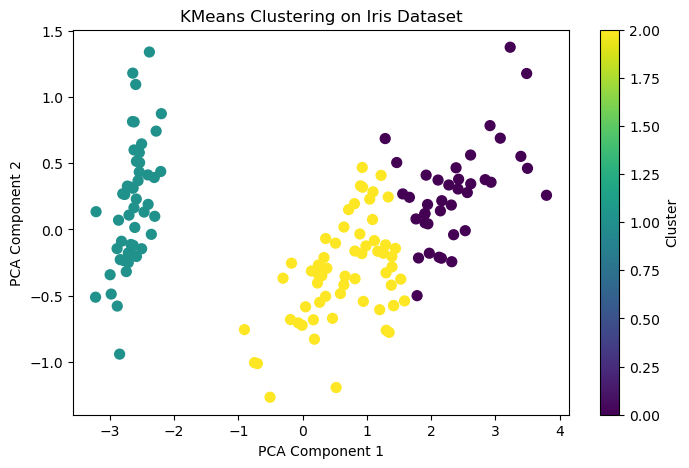

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['kmeans_cluster'] = kmeans.fit_predict(iris_df)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df.iloc[:, :-1])

# Visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['kmeans_cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

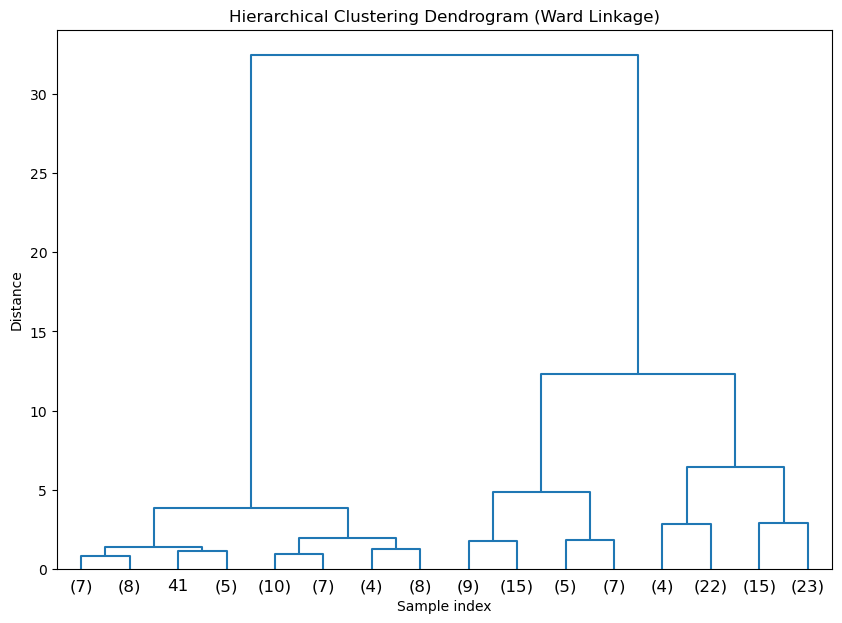

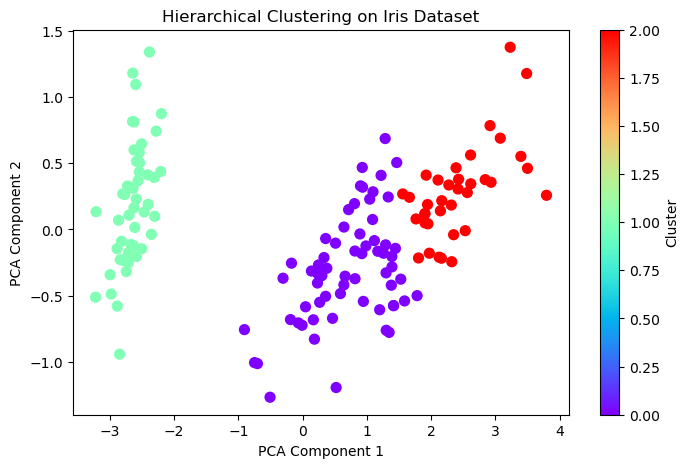

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
iris_df['hierarchical_cluster'] = hierarchical.fit_predict(iris_df.iloc[:, :-1])

# Create a linkage matrix for dendrogram
linkage_matrix = linkage(iris_df.iloc[:, :-2], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=3, color_threshold=0.5)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 2D PCA visualization
plt.figure(figsize=(8, 5))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['hierarchical_cluster'], cmap='rainbow', s=50)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()